In [1]:
import torch

In [2]:
#1-D tensor
data = [1,3,6,7,2]
tensorData = torch.Tensor(data)
print("1-D tensor : ", tensorData)

#multi-D tensor
data = [[1,2,3,4],[5,6,4,3],[5,6,3,8]]
tensorData = torch.Tensor(data)
print("multi-D tensor : ", tensorData)

#random tensor
oneD_data = torch.randn(2)
multiD_data = torch.randn((2,2))
print("1-D Random tensor : ",oneD_data)
print("multi-D Random tensor : ",multiD_data)

1-D tensor :  tensor([1., 3., 6., 7., 2.])
multi-D tensor :  tensor([[1., 2., 3., 4.],
        [5., 6., 4., 3.],
        [5., 6., 3., 8.]])
1-D Random tensor :  tensor([-0.1629,  0.0852])
multi-D Random tensor :  tensor([[ 1.0975, -0.7728],
        [-1.9346, -0.4789]])


In [3]:
#import necessary library
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import os
from google.colab import drive

In [4]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/dataset/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/dataset/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting drive/My Drive/dataset/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to drive/My Drive/dataset/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting drive/My Drive/dataset/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to drive/My Drive/dataset/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting drive/My Drive/dataset/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to drive/My Drive/dataset/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting drive/My Drive/dataset/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to drive/My Drive/dataset/MNIST_data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
#Exploring the dataset
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


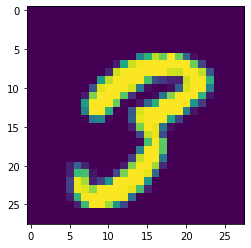

In [6]:
plt.imshow(images[0].numpy().squeeze());

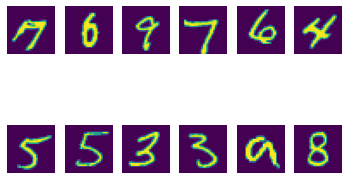

In [7]:
figure = plt.figure()
num_of_images = 12
for index in range(1, num_of_images + 1):
    plt.subplot(2, 6, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze())

In [8]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [9]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [10]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [11]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0158, -0.0323,  0.0336,  ...,  0.0300,  0.0009,  0.0260],
        [ 0.0156,  0.0344, -0.0139,  ...,  0.0248,  0.0300,  0.0094],
        [ 0.0290,  0.0016, -0.0342,  ..., -0.0232, -0.0064,  0.0042],
        ...,
        [ 0.0277, -0.0233, -0.0235,  ...,  0.0039, -0.0272, -0.0074],
        [-0.0015, -0.0074, -0.0191,  ...,  0.0159,  0.0342, -0.0317],
        [ 0.0128,  0.0107, -0.0142,  ...,  0.0291, -0.0250,  0.0068]],
       requires_grad=True)
Gradient - tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0045,  0.0045,  0.0045,  ...,  0.0045,  0.0045,  0.0045],
        ...,
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])


In [12]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0158, -0.0323,  0.0336,  ...,  0.0300,  0.0009,  0.0260],
        [ 0.0156,  0.0344, -0.0139,  ...,  0.0248,  0.0300,  0.0094],
        [ 0.0290,  0.0016, -0.0343,  ..., -0.0232, -0.0064,  0.0041],
        ...,
        [ 0.0277, -0.0233, -0.0236,  ...,  0.0039, -0.0272, -0.0074],
        [-0.0015, -0.0074, -0.0191,  ...,  0.0158,  0.0342, -0.0317],
        [ 0.0128,  0.0107, -0.0142,  ...,  0.0291, -0.0250,  0.0068]],
       requires_grad=True)


In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e+1, running_loss/len(trainloader)))

Epoch 1 - Training loss: 0.6065385782642405
Epoch 2 - Training loss: 0.2800445436859436
Epoch 3 - Training loss: 0.21707095704607363
Epoch 4 - Training loss: 0.1741065836823317
Epoch 5 - Training loss: 0.14420103060820305
Epoch 6 - Training loss: 0.12184715233465183
Epoch 7 - Training loss: 0.1065439546772682
Epoch 8 - Training loss: 0.09460125257795267
Epoch 9 - Training loss: 0.08420041351934582
Epoch 10 - Training loss: 0.07610517725803212
Epoch 11 - Training loss: 0.0702907885280825
Epoch 12 - Training loss: 0.06385324706113947
Epoch 13 - Training loss: 0.058352201780888124
Epoch 14 - Training loss: 0.053900593546465404
Epoch 15 - Training loss: 0.04901368894315422


In [14]:
def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


Predicted Digit = 6


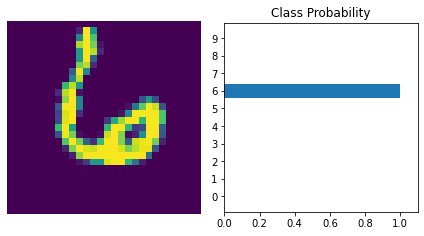

In [21]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [22]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9741
